In [88]:
import numpy as np
import matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [89]:
#read the excel.file
df = pd.read_excel("C:/Users/joelm/Downloads/H1-B VISA DATASET.xlsx", usecols=["CASE_STATUS", "VISA_CLASS","JOB_TITLE","SOC_TITLE","FULL_TIME_POSITION","EMPLOYER_NAME","EMPLOYER_CITY","EMPLOYER_STATE","PREVAILING_WAGE_1","CASE_SUBMITTED"],nrows=600000 )

In [90]:
df.head()

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,PREVAILING_WAGE_1
0,WITHDRAWN,2016-04-08,H-1B,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,Y,"R/GA MEDIA GROUP, INC.",NEW YORK,NY,NaN
1,WITHDRAWN,2017-07-14,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),ADVERTISING AND PROMOTIONS MANAGERS,Y,MOTHER INDUSTRIES LLC,NEW YORK,NY,NaN
2,WITHDRAWN,2017-08-23,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,Y,"WE ARE UNLIMITED, INC.",CHICAGO,IL,NaN
3,WITHDRAWN,2017-12-22,E-3 Australian,PROJECT MANAGEMENT LEAD,ADVERTISING AND PROMOTIONS MANAGERS,Y,"HELLO ELEPHANT, LLC",BROOKLYN,NY,NaN
4,WITHDRAWN,2018-01-10,E-3 Australian,"CREATIVE DIRECTOR, UX",ADVERTISING AND PROMOTIONS MANAGERS,Y,"HELLO ELEPHANT, LLC",BROOKLYN,NY,NaN


In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df['SOC_TITLE'].replace('COMPUTER SYSTEMS ANALYST','COMPUTER SYSTEMS ANALYSTS',inplace=True)

In [93]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPERS, APPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [94]:
df['SOC_TITLE'].replace('SOFTARE DEVELOPERS, APPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [95]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPERS, APPPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [96]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPER APPLICATION','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [97]:
df['SOC_TITLE'].replace('MARKETING MANAGER','MARKETING MANAGERS',inplace=True)

In [98]:
df['SOC_TITLE'].replace('COMPUTER AND INFORMATION SYTEMS MANAGER','COMPUTER INFORMATION SYSTEMS MANAGERS',inplace=True)

In [99]:
df['SOC_TITLE'].replace('COMPUTER AND INFORMATION SYSTEMS MANAGER','COMPUTER INFORMATION SYSTEMS MANAGERS',inplace=True)

In [125]:
df['SOC_TITLE'].replace('SOFTWARE SEVELOPERS, APPPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

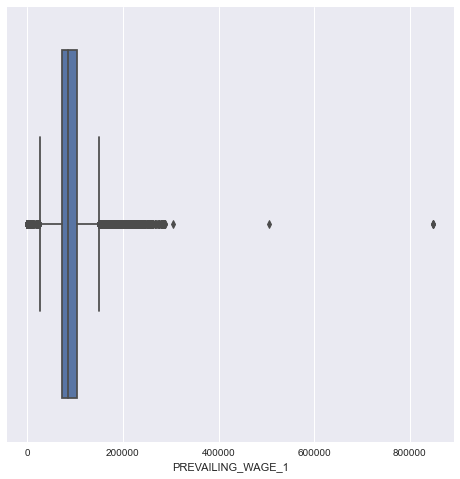

In [100]:
#checking for outlier in 
plt.figure(figsize = (8,8))
sns.boxplot(x = 'PREVAILING_WAGE_1', data = df);

In [101]:
def removeoutliers(df,column):
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  upper=Q3+(1.5*IQR)
  lower=Q1-(1.5*IQR)
  df=df[(df[column]>lower)&(df[column]<upper)]
  return df

In [102]:
#We have removed the outliers in the PREVAILING_WAGE_1
df=removeoutliers(df,'PREVAILING_WAGE_1')

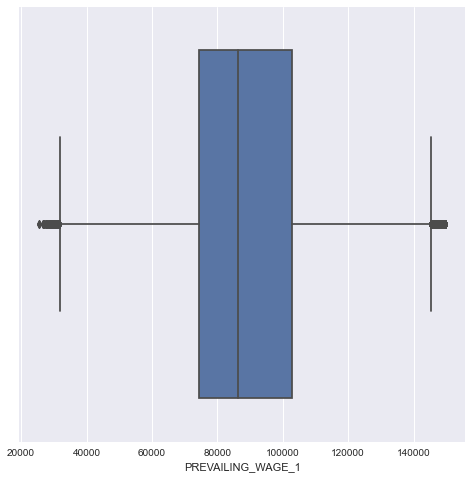

In [103]:
#After removal of outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'PREVAILING_WAGE_1', data = df);

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.info(null_counts=True)

<ipython-input-105-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 519992 entries, 6 to 599999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CASE_STATUS         519992 non-null  object        
 1   CASE_SUBMITTED      519992 non-null  datetime64[ns]
 2   VISA_CLASS          519992 non-null  object        
 3   JOB_TITLE           519992 non-null  object        
 4   SOC_TITLE           519992 non-null  object        
 5   FULL_TIME_POSITION  519992 non-null  object        
 6   EMPLOYER_NAME       519986 non-null  object        
 7   EMPLOYER_CITY       519989 non-null  object        
 8   EMPLOYER_STATE      519964 non-null  object        
 9   PREVAILING_WAGE_1   519992 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 43.6+ MB


# WAGE DISTRIBUTION

In [106]:
total_certified_cases = df[df['CASE_STATUS']=='CERTIFIED']
certified_cases = total_certified_cases[total_certified_cases['PREVAILING_WAGE_1']<150000]

In [107]:
certified_cases.head(3)

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,PREVAILING_WAGE_1
28,CERTIFIED,2018-10-01 11:10:55,E-3 Australian,ACCOUNT SUPERVISOR,ADVERTISING AND PROMOTIONS MANAGERS,Y,"SID LEE USA, INC",LOS ANGELES,CA,126755.0
30,CERTIFIED,2018-10-03 11:24:44,E-3 Australian,ENGAGEMENT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,Y,"HUGE, LLC",BROOKLYN,NY,136178.0
33,CERTIFIED,2018-10-04 09:56:24,E-3 Australian,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,Y,"SID LEE USA, INC",LOS ANGELES,CA,126755.0


C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WAGE DISTRIBUTION')

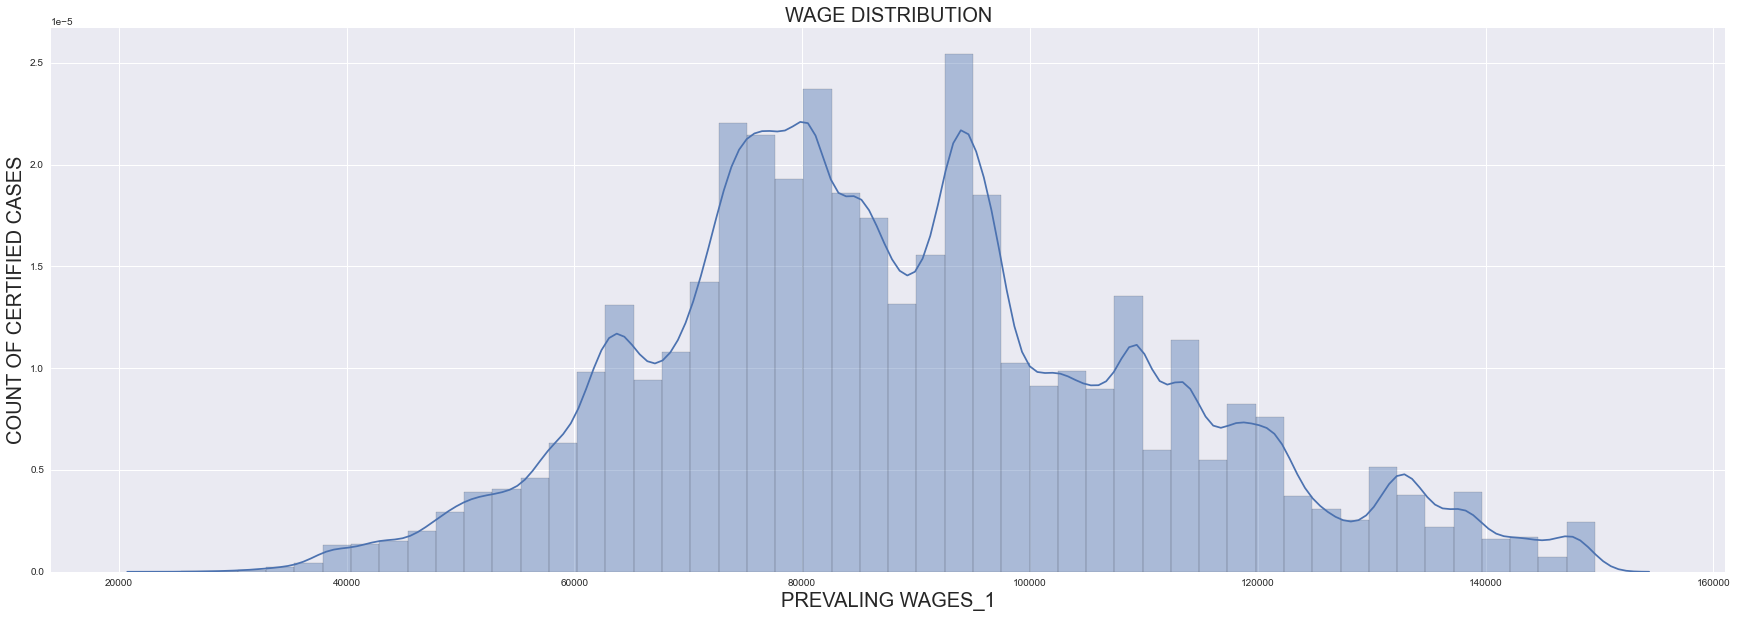

In [108]:
plt.figure(figsize=(30,10))
sns.distplot(certified_cases['PREVAILING_WAGE_1'],kde=True,hist_kws={"edgecolor": "black"})
plt.xlabel('PREVALING WAGES_1',size=20)
plt.ylabel('COUNT OF CERTIFIED CASES', size=20)
plt.title('WAGE DISTRIBUTION',size=20)

# H1-B COUNT OVER YEARS

In [109]:
import datetime
df['YEAR'] = pd.DatetimeIndex(df['CASE_SUBMITTED']).year

In [110]:
yearwise = df.groupby('YEAR').count()

<AxesSubplot:xlabel='YEAR', ylabel='CASE_STATUS'>

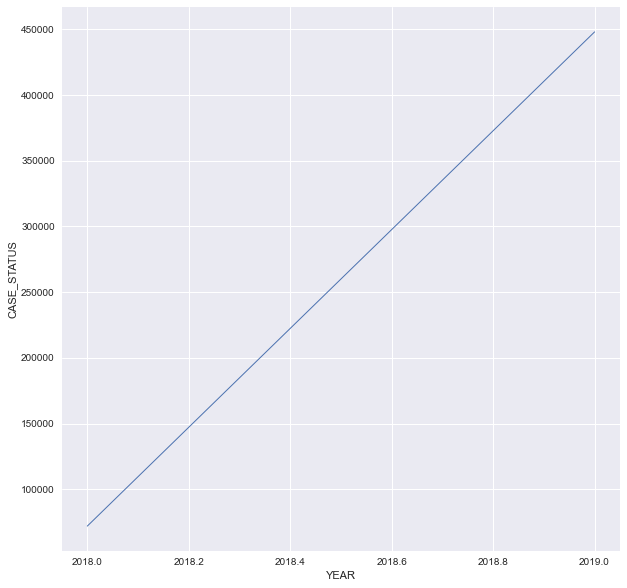

In [111]:
#we can clearly see number of applications submitted for H1-B visa has increased drastically
plt.figure(figsize=(10,10))
sns.lineplot(data=yearwise['CASE_STATUS'],linewidth=1)

# MAIN BENEFICIARY OF H1-B VISA

In [112]:
#top 20 employers
top_twenty=certified_cases['EMPLOYER_NAME'].value_counts()[:20]
top_twenty.to_frame()

,EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,27600
INFOSYS LIMITED,15226
TATA CONSULTANCY SERVICES LIMITED,11727
ERNST & YOUNG U.S. LLP,8568
GOOGLE LLC,8262
CAPGEMINI AMERICA INC,7698
DELOITTE CONSULTING LLP,7403
"AMAZON.COM SERVICES, INC.",6820
MICROSOFT CORPORATION,5554
ACCENTURE LLP,5389


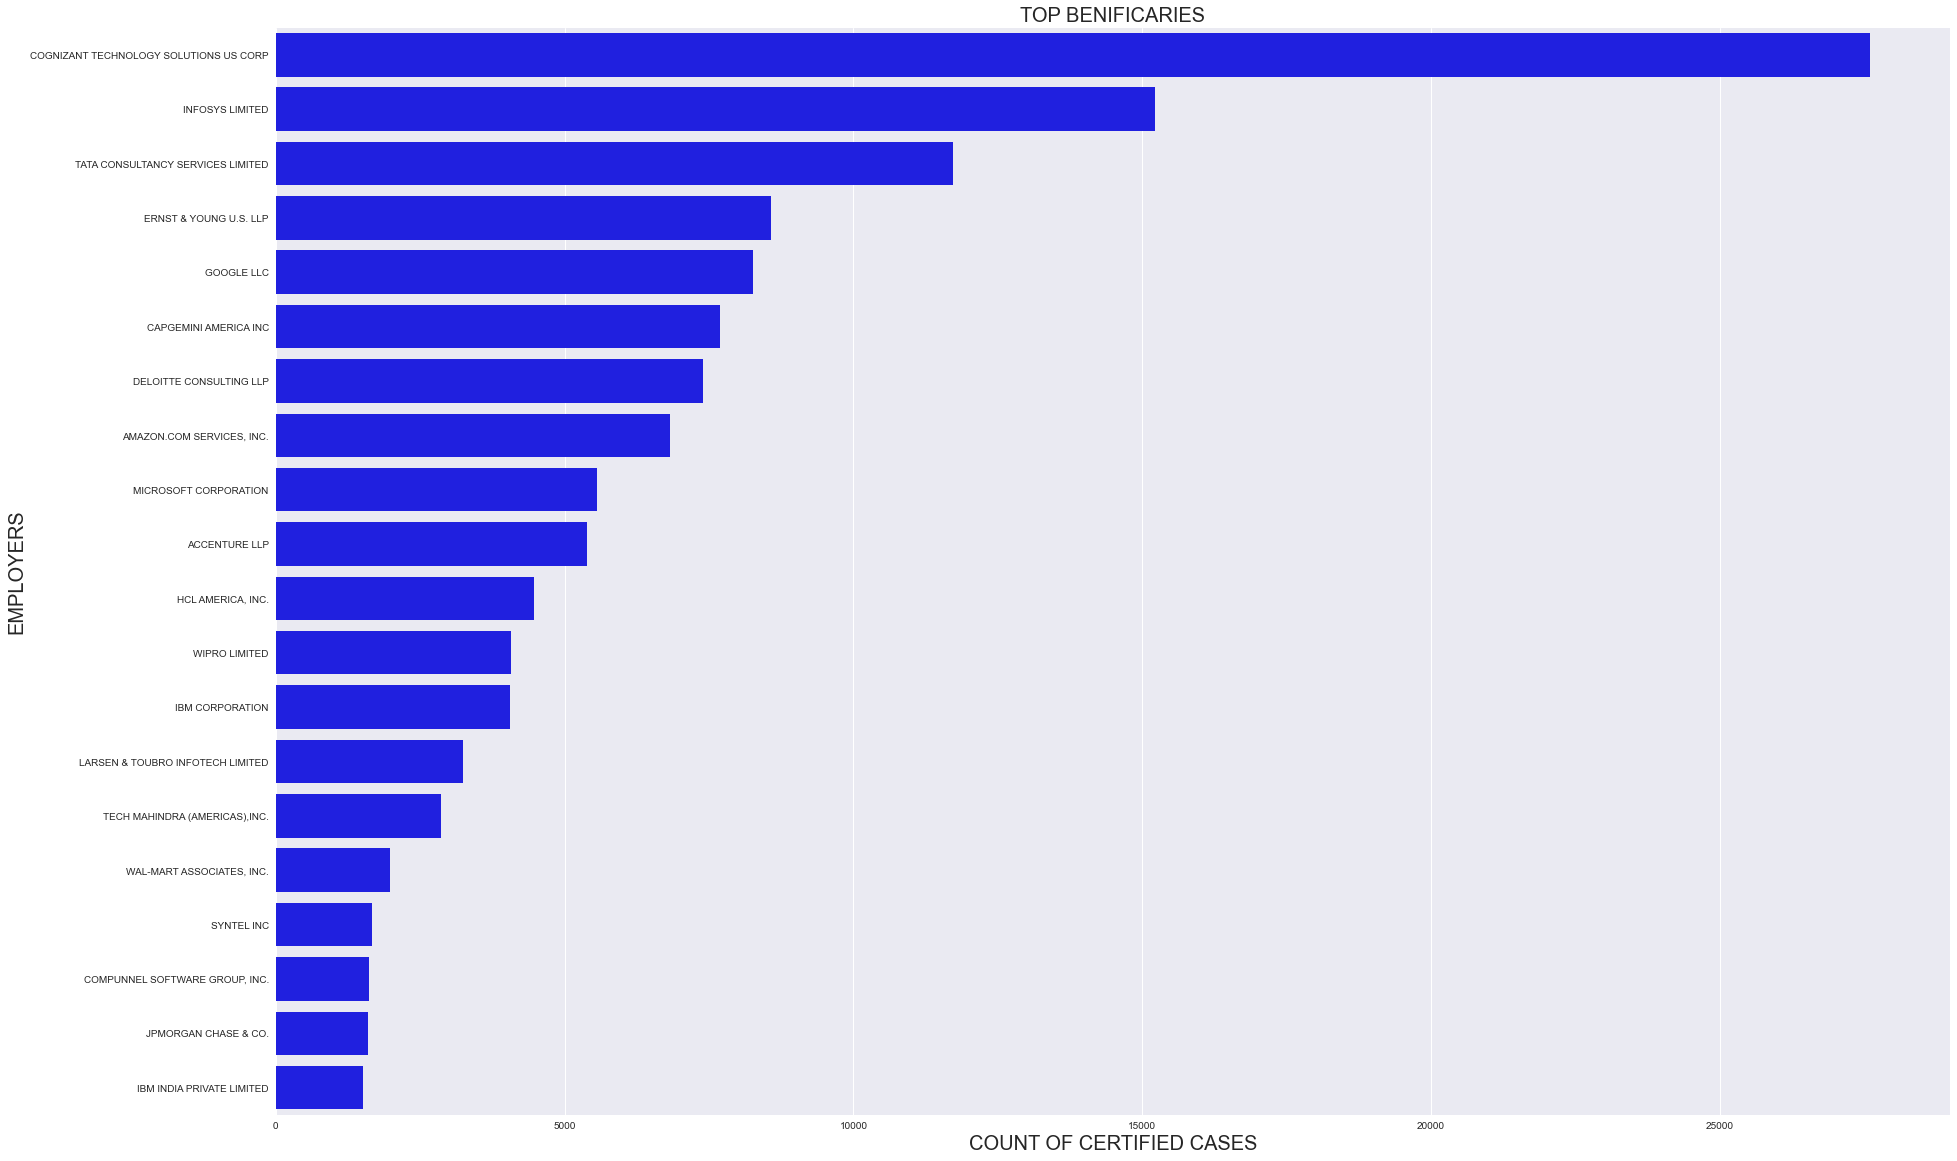

In [113]:
plt.figure(figsize=(30,20))
sns.barplot(x=top_twenty.values,y=top_twenty.index,color='blue')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('EMPLOYERS', size=20)
plt.title('TOP BENIFICARIES',size=20)
plt.show()

# we take top 10 beneficiary of h1-b visa and see how the salary is distributed

C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

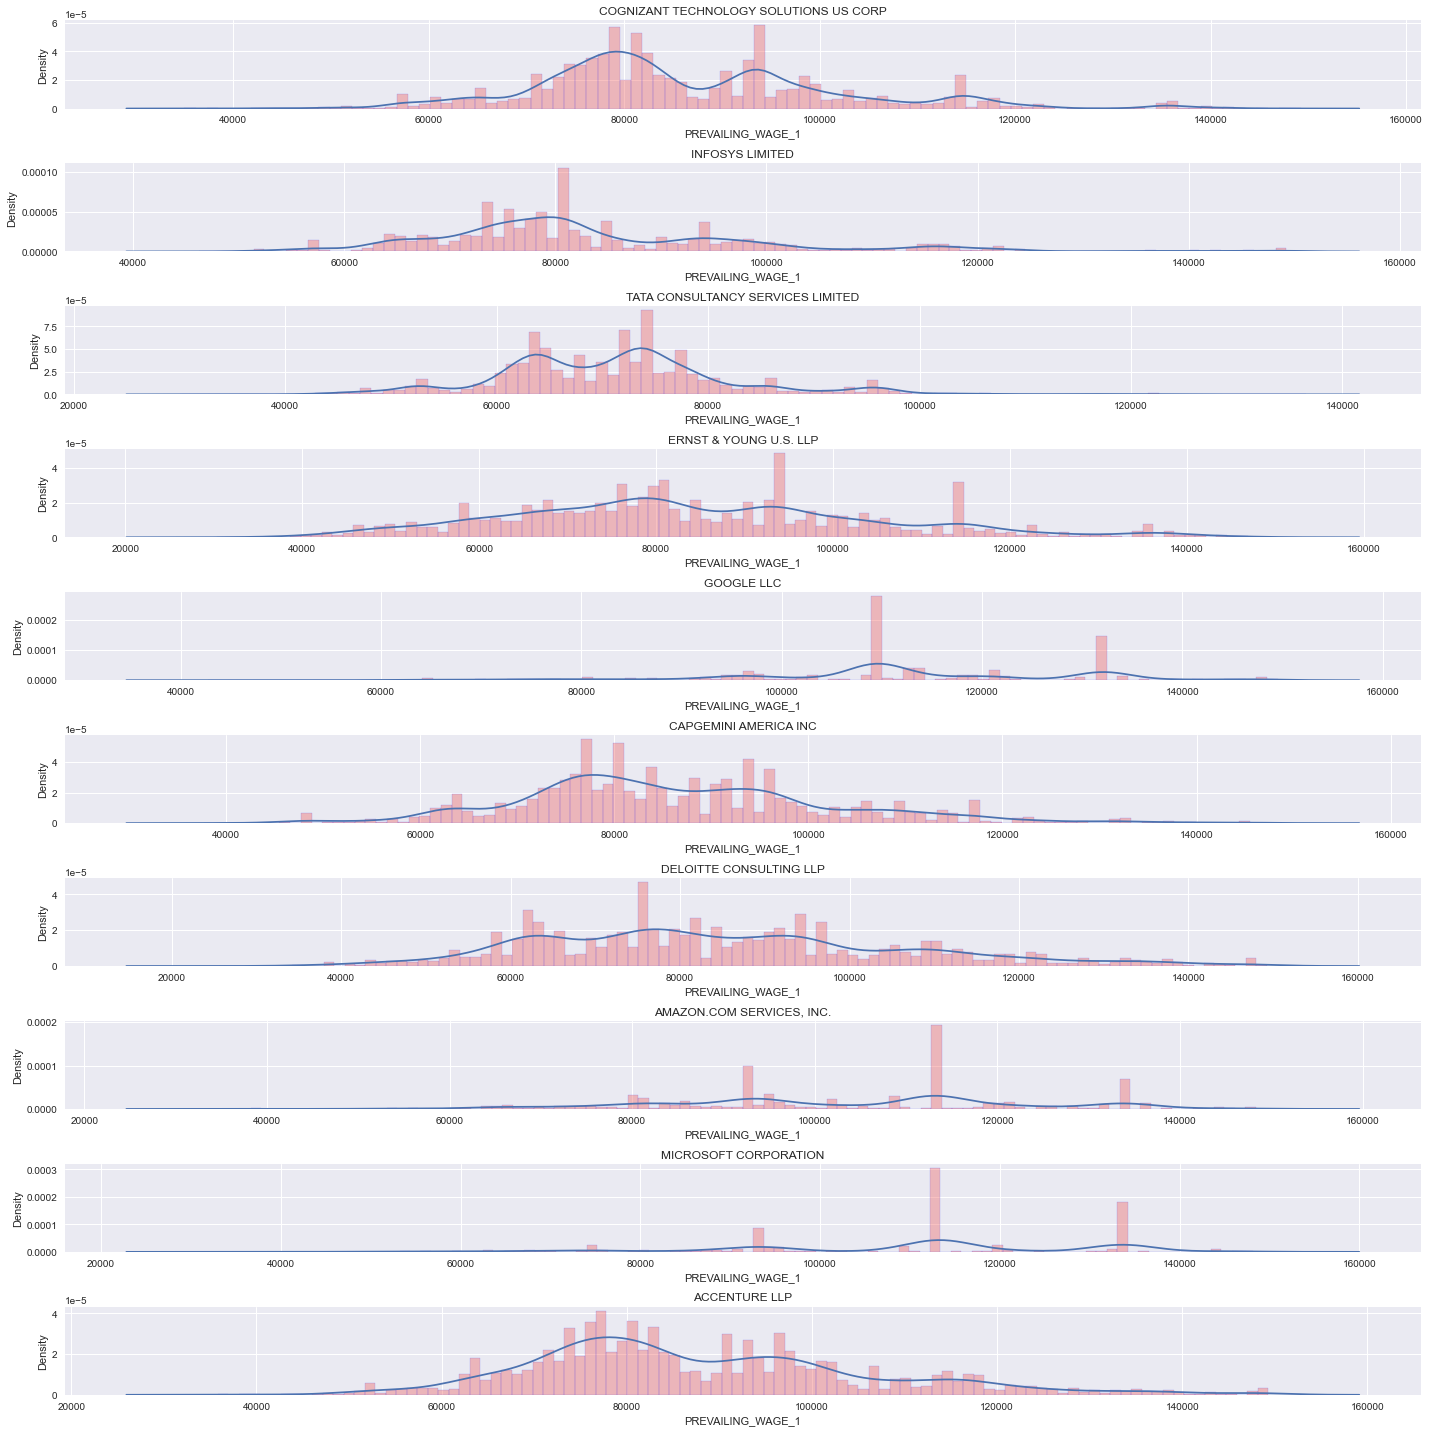

In [114]:
f,axes = plt.subplots(nrows=10,ncols=1, figsize=(20,20),sharey=False)
rowcount=0
companies = top_twenty.index[:10]
for company in companies:
    axes[rowcount].set_title(company)
    wage = certified_cases[certified_cases['EMPLOYER_NAME']==company]['PREVAILING_WAGE_1']
    sns.distplot(wage ,ax=axes[rowcount],bins=100,hist_kws= {"edgecolor":"blue", "color": "#EE6666"}, kde=True)
    rowcount+=1
    
plt.tight_layout()

# What are the top roles 

Text(0.5, 1.0, 'TOP JOB BENIFICARIES')

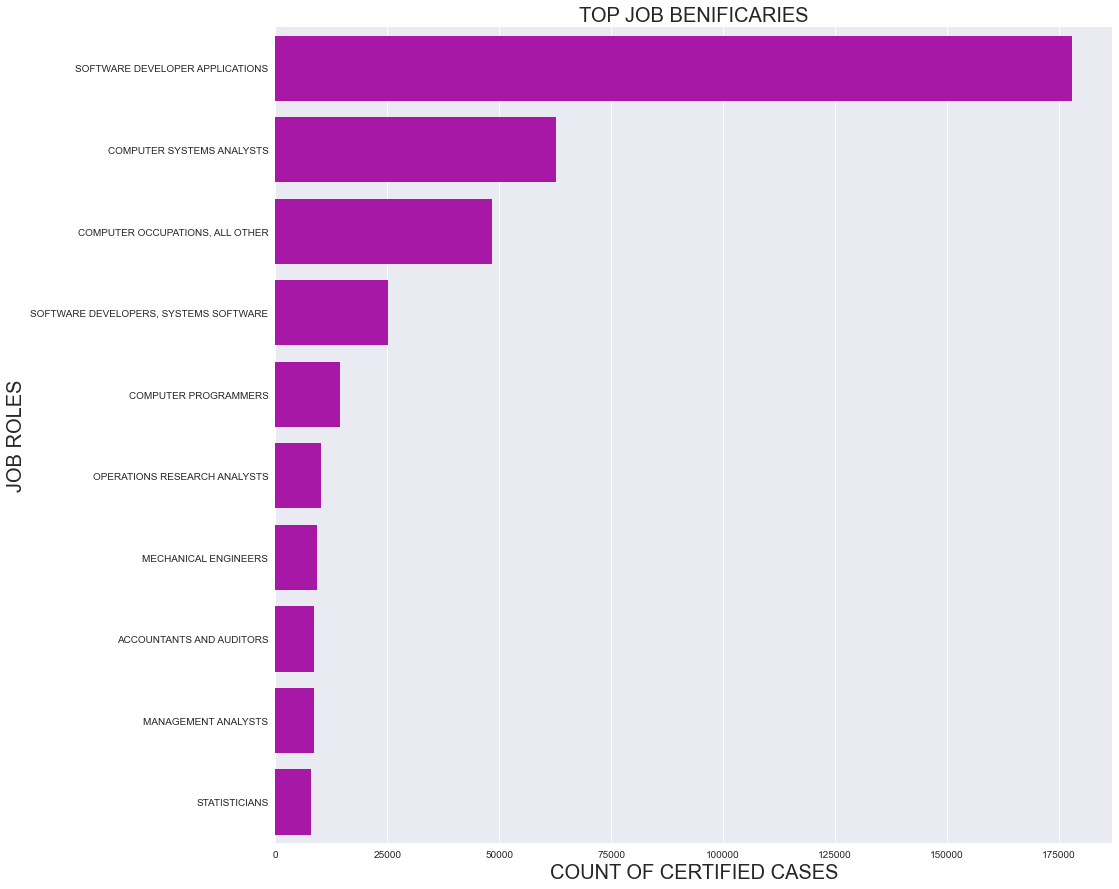

In [115]:
top_roles = certified_cases['SOC_TITLE'].value_counts().head(10)
plt.figure(figsize=(15,15))
sns.barplot(y = top_roles.index ,x = top_roles.values ,color='m')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('TOP JOB BENIFICARIES',size=20)

# Does having a full time job position influence the chance of getting the visa

In [158]:
certified_cases[certified_cases["FULL_TIME_POSITION"] == "Y"].count()

CASE_STATUS           485941
CASE_SUBMITTED        485941
VISA_CLASS            485941
JOB_TITLE             485941
SOC_TITLE             485941
FULL_TIME_POSITION    485941
EMPLOYER_NAME         485938
EMPLOYER_CITY         485939
EMPLOYER_STATE        485917
PREVAILING_WAGE_1     485941
dtype: int64

<AxesSubplot:>

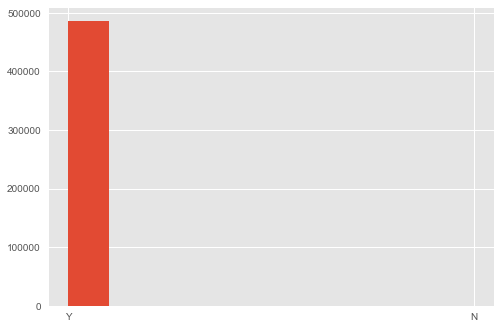

In [159]:
certified_cases['FULL_TIME_POSITION'].hist()

# How many people are granted the visa.

In [160]:
df.groupby('CASE_STATUS').count()

,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,PREVAILING_WAGE_1,YEAR
CASE_STATUS,,,,,,,,,,
CERTIFIED,485971,485971,485971,485971,485971,485968,485969,485947,485971,485971
CERTIFIED-WITHDRAWN,16698,16698,16698,16698,16698,16698,16698,16695,16698,16698
DENIED,3766,3766,3766,3766,3766,3765,3766,3766,3766,3766
WITHDRAWN,13557,13557,13557,13557,13557,13555,13556,13556,13557,13557


<AxesSubplot:xlabel='CASE_STATUS'>

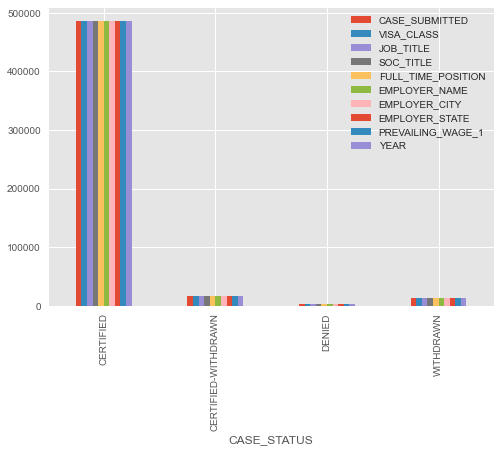

In [161]:
df.groupby('CASE_STATUS').count().plot(kind = 'bar')